### ROC and AUC analysis on classification project.

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  (confusion_matrix,
                            classification_report,
                            roc_curve,
                            roc_auc_score,
                            auc)
import warnings 
warnings.filterwarnings('ignore')
print("libraries is imported!")

libraries is imported!


In [23]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [24]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1,'Personal Travel':0})
df['Class'] = df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})


In [25]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0


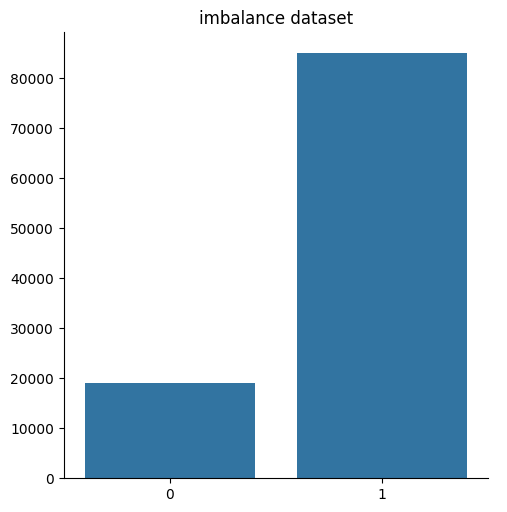

In [26]:
sns.catplot(x = list((df['Customer Type'].value_counts().keys())),y=list((df['Customer Type'].value_counts().values)),kind='bar')
plt.title('imbalance dataset')
plt.show()

In [27]:
loyal_customer = df[df['Customer Type']==1].loc[0:20000]
disloyal_customer = df[df['Customer Type']==0]

In [28]:
balance_df = pd.concat([loyal_customer,disloyal_customer])

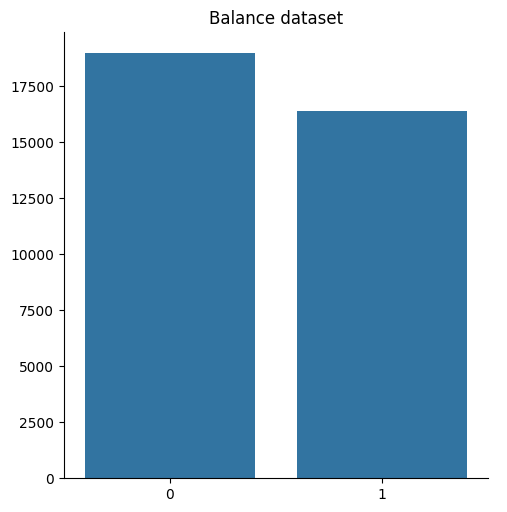

In [29]:
sns.catplot(x = list((balance_df['Customer Type'].value_counts().keys())),y=list((balance_df['Customer Type'].value_counts().values)),kind='bar')
plt.title('Balance dataset')
plt.show()

In [30]:
balance_df.isnull().sum()

Gender                         0
Customer Type                  0
Type of Travel                 0
Class                          0
satisfaction                   0
Age                            0
Flight Distance                0
Inflight entertainment         0
Baggage handling               0
Cleanliness                    0
Departure Delay in Minutes     0
Arrival Delay in Minutes      94
dtype: int64

In [31]:
null_df = balance_df[balance_df.isnull()['Arrival Delay in Minutes']]
null_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,0,1,1,2,1,38,109,5,4,5,31,NaN
1124,1,1,0,2,0,53,1012,4,4,4,38,NaN
1529,1,1,1,1,0,39,733,2,2,3,11,NaN
2108,0,1,0,2,0,24,417,5,2,5,1,NaN
2485,0,1,0,2,1,28,2370,3,4,3,3,NaN


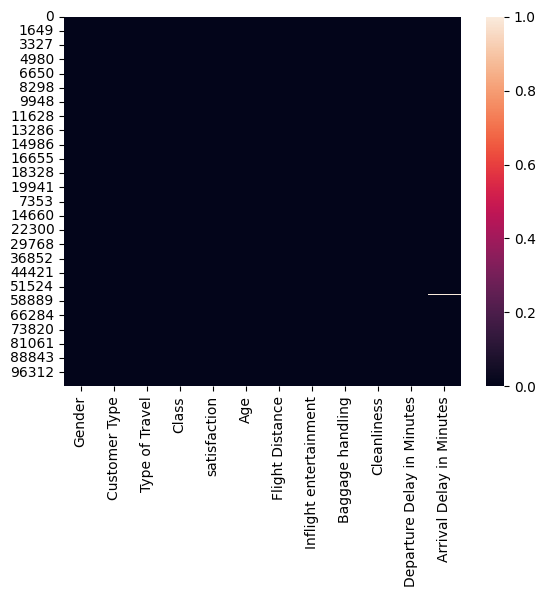

In [32]:
sns.heatmap(balance_df.isnull())
plt.show()
# to visualaize the represenatation of missing value

In [33]:
balance_df.dropna().isnull().sum()
## null free data

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [34]:
null_free_df = balance_df.dropna()

In [35]:
x = null_free_df.drop('Customer Type',axis=1)
y = null_free_df[['Customer Type']]

In [36]:
x.shape ,y.shape

((35269, 11), (35269, 1))

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [38]:
lg = LogisticRegression()

In [39]:
lg.fit(x_train,y_train)

LogisticRegression()

In [45]:
print("Training score : ",lg.score(x_train,y_train))
print("Testing score : ",lg.score(x_test,y_test))


Training score :  0.7552011341485025
Testing score :  0.755316132690672


In [41]:
y_pred = lg.predict(x_test)

In [46]:
y_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [48]:
y_pred2 = lg.predict_proba(x_test)
y_pred2

array([[0.04942604, 0.95057396],
       [0.54451632, 0.45548368],
       [0.90707632, 0.09292368],
       ...,
       [0.24648762, 0.75351238],
       [0.53017869, 0.46982131],
       [0.94774985, 0.05225015]])

In [ ]:
## prooved .5 threshold used by predict functin 
predictions = (y_pred2>0.5).astype(int)
# predictions
predictions[:,1][0:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [42]:
confusion_matrix(y_test,y_pred)

array([[3072,  693],
       [1033, 2256]])

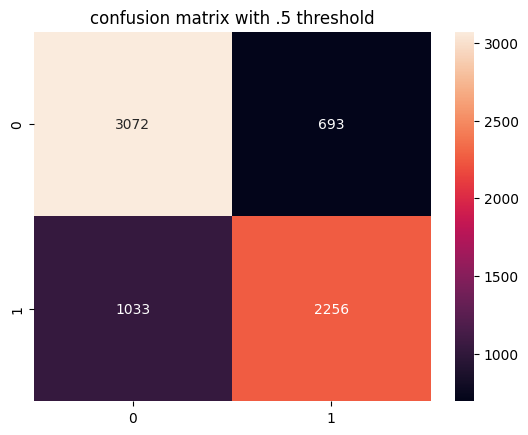

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True)
plt.title("confusion matrix with .5 threshold")
plt.show()

In [ ]:
# classification_report with .5 thresold
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      3765
           1       0.77      0.69      0.72      3289

    accuracy                           0.76      7054
   macro avg       0.76      0.75      0.75      7054
weighted avg       0.76      0.76      0.75      7054



### ROC CURVE ANALYSIS

In [67]:
y_pred2

array([[0.04942604, 0.95057396],
       [0.54451632, 0.45548368],
       [0.90707632, 0.09292368],
       ...,
       [0.24648762, 0.75351238],
       [0.53017869, 0.46982131],
       [0.94774985, 0.05225015]])

In [69]:
fpr,tpr,threshold = roc_curve(y_test,y_pred2[:,1])

In [96]:
roc_auc = auc(fpr, tpr)   # area under curve 
print("area under the curve : ",round(roc_auc,2))

area under the curve :  0.83


In [100]:
print("Area under the curve score : ",round((float(roc_auc_score(y_test,y_pred2[:,1]))),2))

Area under the curve score :  0.83


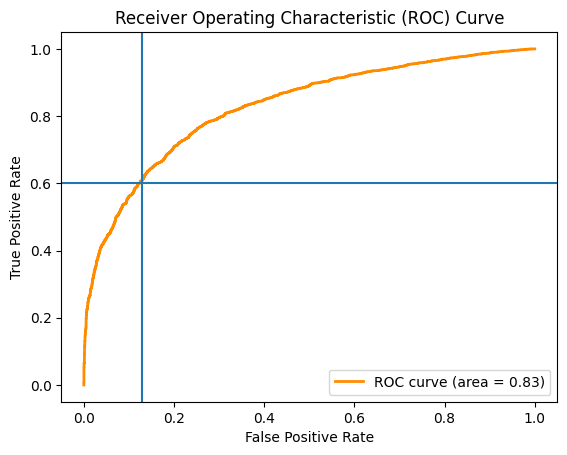

In [90]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.axhline(.6)
plt.axvline(.13)

plt.show()

### precision_recall_curve
<p> ROC curve in betwn Recall (TPR) vs Precision.</p>

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
